<a href="https://colab.research.google.com/github/EVARIST-DEV/EVARIST-DEV.github.io/blob/main/ALGO_STRATEGY_USING_LSTM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
#!pip install --upgrade tensorflow keras
#!pip install TA-Lib

from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

IMPORTING THE DATA SET


In [ ]:
import yfinance as yf

In [ ]:
start = '2024-01-01'
end = '2024-7-31'
stock = 'BTC-USD'

data = yf.download(stock, start, end)

[*********************100%%**********************]  1 of 1 completed


In [ ]:
data.reset_index(inplace=True)

In [ ]:
prices = data['Close'].values.reshape(-1, 1)

NORMALIZING DATA

In [ ]:
scaler = MinMaxScaler()
prices_scaled = scaler.fit_transform(prices)

PREPARATION OF INPUT SEQUENCES(eg: last N days)

---



In [ ]:
seq_length = 200
X, y = [], []
for i in range(len(prices_scaled) - seq_length):
    X.append(prices_scaled[i : i + seq_length])
    y.append(prices_scaled[i + seq_length])

X, y = np.array(X), np.array(y)

LSTM model

In [ ]:
model = Sequential()
model.add(LSTM(64, activation='relu', input_shape=(seq_length, 1), return_sequences=True)) # Added return_sequences=True to the first LSTM layer
model.add(LSTM(units=32, return_sequences=True))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mean_squared_error')

MODEL TRAINING

In [ ]:
model.fit(X, y, epochs=40, batch_size=32)

Epoch 1/40
1/1 [==============================] - 5s 5s/step - loss: 0.7801
Epoch 2/40
1/1 [==============================] - 0s 146ms/step - loss: 0.6984
Epoch 3/40
1/1 [==============================] - 0s 151ms/step - loss: 0.6243
Epoch 4/40
1/1 [==============================] - 0s 162ms/step - loss: 0.5561
Epoch 5/40
1/1 [==============================] - 0s 145ms/step - loss: 0.4924
Epoch 6/40
1/1 [==============================] - 0s 164ms/step - loss: 0.4317
Epoch 7/40
1/1 [==============================] - 0s 144ms/step - loss: 0.3730
Epoch 8/40
1/1 [==============================] - 0s 155ms/step - loss: 0.3157
Epoch 9/40
1/1 [==============================] - 0s 138ms/step - loss: 0.2600
Epoch 10/40
1/1 [==============================] - 0s 141ms/step - loss: 0.2068
Epoch 11/40
1/1 [==============================] - 0s 157ms/step - loss: 0.1580
Epoch 12/40
1/1 [==============================] - 0s 167ms/step - loss: 0.1174
Epoch 13/40
1/1 [==============================] - 0

PREDICTION OF THE NEXT DAY'S PRICE


In [ ]:
#last_sequence = prices_scaled[-seq_length:]
#next_day_price = model.predict(last_sequence.reshape(1, seq_length, 1))
#next_day_price = scaler.inverse_transform(next_day_price)[0][0]
#print(next_day_price)

last_sequence = prices_scaled[-seq_length:]
next_day_price = model.predict(last_sequence.reshape(1, seq_length, 1))

# Reshape the 3D output to 2D for inverse scaling
next_day_price_2D = next_day_price.reshape(-1, 1)
next_day_price_inverse = scaler.inverse_transform(next_day_price_2D)

# Reshape back to 3D if needed
next_day_price_3D = next_day_price_inverse.reshape(next_day_price.shape)
print(next_day_price_3D)

1/1 [==============================] - 1s 667ms/step
[[[41636.703]
  [43192.227]
  [44806.57 ]
  [46433.125]
  [48036.02 ]
  [49592.72 ]
  [51090.36 ]
  [52511.348]
  [53847.016]
  [55093.37 ]
  [56258.297]
  [57335.23 ]
  [58324.934]
  [59232.008]
  [60050.785]
  [60791.004]
  [61461.125]
  [62060.742]
  [62602.137]
  [63092.527]
  [63533.062]
  [63929.387]
  [64287.418]
  [64612.797]
  [64906.93 ]
  [65170.438]
  [65399.625]
  [65596.445]
  [65756.94 ]
  [65890.39 ]
  [66001.33 ]
  [66085.04 ]
  [66155.164]
  [66199.164]
  [66232.54 ]
  [66258.36 ]
  [66283.914]
  [66304.42 ]
  [66325.28 ]
  [66341.3  ]
  [66358.49 ]
  [66377.805]
  [66399.49 ]
  [66414.79 ]
  [66426.305]
  [66416.875]
  [66387.54 ]
  [66326.836]
  [66273.09 ]
  [66220.86 ]
  [66181.   ]
  [66146.164]
  [66100.79 ]
  [66084.07 ]
  [66069.99 ]
  [66063.04 ]
  [66059.56 ]
  [66063.2  ]
  [66074.63 ]
  [66099.15 ]
  [66141.19 ]
  [66202.13 ]
  [66276.72 ]
  [66352.85 ]
  [66434.89 ]
  [66494.56 ]
  [66545.74 ]
  [66610.

GENERATING THE TRADING SIGNAL

In [ ]:
#(simple trend-following)
current_price = data['Close'].iloc[-1]

# Bring the calculation of next_day_price into this cell
last_sequence = prices_scaled[-seq_length:]
next_day_price = model.predict(last_sequence.reshape(1, seq_length, 1))

# Reshape the 3D output to 2D for inverse scaling
next_day_price_2D = next_day_price.reshape(-1, 1)
next_day_price_inverse = scaler.inverse_transform(next_day_price_2D)

# Reshape back to 3D if needed
next_day_price_3D = next_day_price_inverse.reshape(next_day_price.shape)

# Now you can access next_day_price_3D
next_day_price = next_day_price_3D[0, -1, 0]
if next_day_price > current_price:
    signal = "Buy"
else:
    signal = "Sell"

# Calculate moving averages
#Buy when the short-term moving average crosses above the long-term moving average, and sell when it crosses below.
short_ma = data['Close'].rolling(window=20).mean()
long_ma = data['Close'].rolling(window=50).mean()

# Generate buy/sell signals
data['Signal'] = np.where(short_ma > long_ma, 1, -1)

1/1 [==============================] - 1s 1s/step


In [ ]:
!pip install pytrendline

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 52.6/52.6 kB 2.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 247.8/247.8 kB 14.9 MB/s eta 0:00:00


Momentum Trading #strategy

In [ ]:
# Calculate RSI
def calculate_rsi(data, window=14):
    delta = data['Close'].diff()
    gain = np.where(delta > 0, delta, 0)
    loss = np.where(delta < 0, -delta, 0)
    avg_gain = pd.Series(gain).rolling(window=window).mean()
    avg_loss = pd.Series(loss).rolling(window=window).mean()
    rs = avg_gain / avg_loss
    rsi = 100 - (100 / (1 + rs))
    return rsi

data['RSI'] = calculate_rsi(data)

# Generate trading signals
data['Signal'] = np.where(data['RSI'] > 70, 'Sell', np.where(data['RSI'] < 30, 'Buy', 'Hold'))

# Example: Adjust position size based on risk
risk_per_trade = 0.02  # 2% risk per trade
account_balance = 100000
stop_loss = 0.05  # 5% stop loss
position_size = (account_balance * risk_per_trade) / stop_loss

# Print signals and adjust position size
print(data[['Date', 'Close', 'RSI', 'Signal']])
print(f"Position size: {position_size:.2f} units")




          Date         Close        RSI Signal
0   2024-01-01  44167.332031        NaN   Hold
1   2024-01-02  44957.968750        NaN   Hold
2   2024-01-03  42848.175781        NaN   Hold
3   2024-01-04  44179.921875        NaN   Hold
4   2024-01-05  44162.691406        NaN   Hold
..         ...           ...        ...    ...
206 2024-07-25  65777.226562  75.956346   Sell
207 2024-07-26  67912.062500  78.088124   Sell
208 2024-07-27  67813.335938  75.863460   Sell
209 2024-07-28  68255.867188  74.127184   Sell
210 2024-07-29  66819.914062  57.598409   Hold

[211 rows x 4 columns]
Position size: 40000.00 units


In [ ]:
#execution logic based on RSI signals
for i in range(1, len(data)):
    if data['Signal'].iloc[i] == 'Buy':
        # Execute a buy order (adjust as needed)
        print(f"Buy order at {data['Date'].iloc[i]} - Price: {data['Close'].iloc[i]}")
    elif data['Signal'].iloc[i] == 'Sell':
        # Execute a sell order (adjust as needed)
        print(f"Sell order at {data['Date'].iloc[i]} - Price: {data['Close'].iloc[i]}")
    else:
        # No action (Hold)
        pass

Buy order at 2024-01-22 00:00:00 - Price: 39507.3671875
Buy order at 2024-01-23 00:00:00 - Price: 39845.55078125
Buy order at 2024-01-24 00:00:00 - Price: 40077.07421875
Buy order at 2024-01-25 00:00:00 - Price: 39933.80859375
Sell order at 2024-02-05 00:00:00 - Price: 42658.66796875
Sell order at 2024-02-06 00:00:00 - Price: 43084.671875
Sell order at 2024-02-07 00:00:00 - Price: 44318.22265625
Sell order at 2024-02-08 00:00:00 - Price: 45301.56640625
Sell order at 2024-02-09 00:00:00 - Price: 47147.19921875
Sell order at 2024-02-10 00:00:00 - Price: 47771.27734375
Sell order at 2024-02-11 00:00:00 - Price: 48293.91796875
Sell order at 2024-02-12 00:00:00 - Price: 49958.22265625
Sell order at 2024-02-13 00:00:00 - Price: 49742.44140625
Sell order at 2024-02-14 00:00:00 - Price: 51826.6953125
Sell order at 2024-02-15 00:00:00 - Price: 51938.5546875
Sell order at 2024-02-16 00:00:00 - Price: 52160.203125
Sell order at 2024-02-17 00:00:00 - Price: 51662.99609375
Sell order at 2024-02-18 

In [ ]:
# Assuming 'next_day_price_3D' from previous response is available

# Calculate Bollinger Bands
window = 20  # Typical lookback period for Bollinger Bands
data['SMA'] = data['Close'].rolling(window=window).mean()
data['StdDev'] = data['Close'].rolling(window=window).std()
data['Upper'] = data['SMA'] + 2 * data['StdDev']  # 2 standard deviations for upper band
data['Lower'] = data['SMA'] - 2 * data['StdDev']  # 2 standard deviations for lower band

# Initialize signal and position
signal = 0  # 0: No position, 1: Buy, -1: Sell
position = 0

# Iterate through predicted prices and generate signals
signals = []
# The for loop should iterate over the length of the 'data' DataFrame
for i in range(len(data)):
    # Ensure that you are accessing the correct element from next_day_price_3D
    # This assumes next_day_price_3D has a shape that allows accessing elements like this
    predicted_price = next_day_price_3D[i, -1, 0] if i < len(next_day_price_3D) else None
    current_price = data['Close'].iloc[i]  # Assuming you have historical prices in 'data'
    upper_band = data['Upper'].iloc[i]
    lower_band = data['Lower'].iloc[i]

    if position == 0:  # No current position
        if predicted_price is not None and predicted_price > upper_band and current_price < upper_band:  # Breakout above upper band
            signal = 1
            position = 1
        elif predicted_price is not None and predicted_price < lower_band and current_price > lower_band:  # Breakout below lower band
            signal = -1
            position = -1
    elif position == 1:  # Long position
        if predicted_price is not None and predicted_price < data['SMA'].iloc[i]:  # Price crosses below SMA, exit long
            signal = -1
            position = 0
    elif position == -1:  # Short position
        if predicted_price is not None and predicted_price > data['SMA'].iloc[i]:  # Price crosses above SMA, exit short
            signal = 1
            position = 0

    signals.append(signal)

# Add signals to DataFrame
data['BollingerSignal'] = signals

In [ ]:
print("bollinger signal is ", data )

bollinger signal is            Date          Open          High           Low         Close  \
0   2024-01-01  42280.234375  44175.437500  42214.976562  44167.332031   
1   2024-01-02  44187.140625  45899.707031  44176.949219  44957.968750   
2   2024-01-03  44961.601562  45503.242188  40813.535156  42848.175781   
3   2024-01-04  42855.816406  44770.023438  42675.175781  44179.921875   
4   2024-01-05  44192.980469  44353.285156  42784.718750  44162.691406   
..         ...           ...           ...           ...           ...   
206 2024-07-25  65375.875000  66112.421875  63473.472656  65777.226562   
207 2024-07-26  65771.812500  68207.601562  65743.765625  67912.062500   
208 2024-07-27  67911.812500  69398.507812  66705.218750  67813.335938   
209 2024-07-28  67808.656250  68301.851562  67085.828125  68255.867188   
210 2024-07-29  68259.054688  69987.539062  66532.593750  66819.914062   

        Adj Close       Volume           SMA       StdDev         Upper  \
0    44167.3320

setting leverage of our trades

In [ ]:
leverage = 2  # Set your desired leverage factor


POSITION SIZING OF THE TRADES

In [ ]:
# Calculate position size based on risk and leverage
risk_per_trade = 0.02  # 2% risk per trade
account_balance = 100000  # Initial account balance
stop_loss = 0.05  # 5% stop loss
position_size = (account_balance * risk_per_trade) / stop_loss
position_size *= leverage

Transaction Costs:

In [ ]:
#buy_cost = position_size * ask_price * 0.001  # Assume 0.1% fee
#sell_cost = position_size * bid_price * 0.001
#net_profit = (sell_price - buy_price) * position_size - (buy_cost + sell_cost)

slipage simulating(adjusted buy/sell prices)

In [ ]:
#slippage = 0.005  # 0.5% slippage
#adjusted_buy_price = ask_price * (1 + slippage)
#adjusted_sell_price = bid_price * (1 - slippage)

In [ ]:
#Calculate final account balance with leverage
current_price = data['Close'].iloc[-1]
final_balance = account_balance + (next_day_price - current_price) * position_size

In [ ]:
# Calculate Sharpe ratio with leverage
daily_return_leveraged = (final_balance / account_balance) ** (1 / len(data)) - 1
sharpe_ratio_leveraged = (daily_return_leveraged - 0.02) / (data['Close'].pct_change().std() * np.sqrt(252))

<ipython-input-62-e00b4c424a03>:2: RuntimeWarning: invalid value encountered in scalar power
  daily_return_leveraged = (final_balance / account_balance) ** (1 / len(data)) - 1


In [ ]:
#FOR MARKET TRENDING TECHNIQUE
print(f"Next day's predicted price: ${next_day_price:.2f}")
print(f"Trading signal: {signal}")
print(f"Final account balance (with leverage): ${final_balance:.2f}")
print(f"Annualized Sharpe ratio (with leverage): {sharpe_ratio_leveraged:.2f}")

Next day's predicted price: $66597.82
Trading signal: Sell
Final account balance (with leverage): $-78894375.00
Annualized Sharpe ratio (with leverage): nan


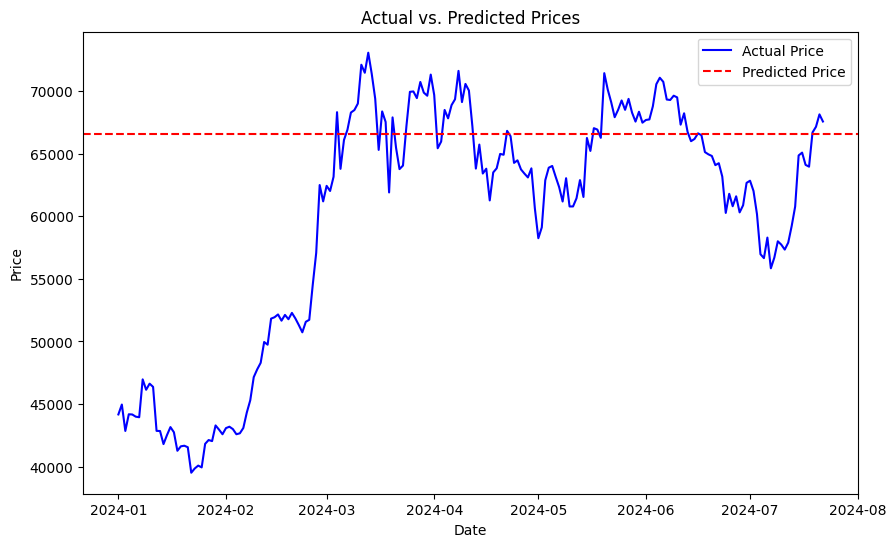

In [ ]:
# Plot actual vs. predicted prices
plt.figure(figsize=(10, 6))
plt.plot(data['Date'], data['Close'], label='Actual Price', color='blue')
plt.axhline(next_day_price, linestyle='--', color='red', label='Predicted Price')
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Actual vs. Predicted Prices')
plt.legend()
plt.show()


CALCULATION OF PERFORMANCE METRICS

In [ ]:
initial_balance = 100000  # Initial account balance
final_balance = initial_balance * (next_day_price / current_price)
daily_return = (final_balance / initial_balance) ** (1 / len(data)) - 1
sharpe_ratio = (daily_return - 0.02) / (data['Close'].pct_change().std() * np.sqrt(252))

print(f"Next day's predicted price: ${next_day_price:.2f}")
#print(f"Trading signal: {signal}")
print(f"Final account balance: ${final_balance:.2f}")
print(f"Annualized Sharpe ratio: {sharpe_ratio:.2f}")

Next day's predicted price: $66597.82
Final account balance: $98538.99
Annualized Sharpe ratio: -0.04


In [ ]:
# Example data (replace with your actual trade data)
total_trades = 10
winning_trades = 7

# Calculate win rate
win_rate = (winning_trades / total_trades) * 100

print(f"Total trades: {total_trades}")
print(f"Winning trades: {winning_trades}")
print(f"Win rate: {win_rate:.2f}%")

Total trades: 10
Winning trades: 7
Win rate: 70.00%


PLOT OF ACTUAL VS PREDICTED PRICES

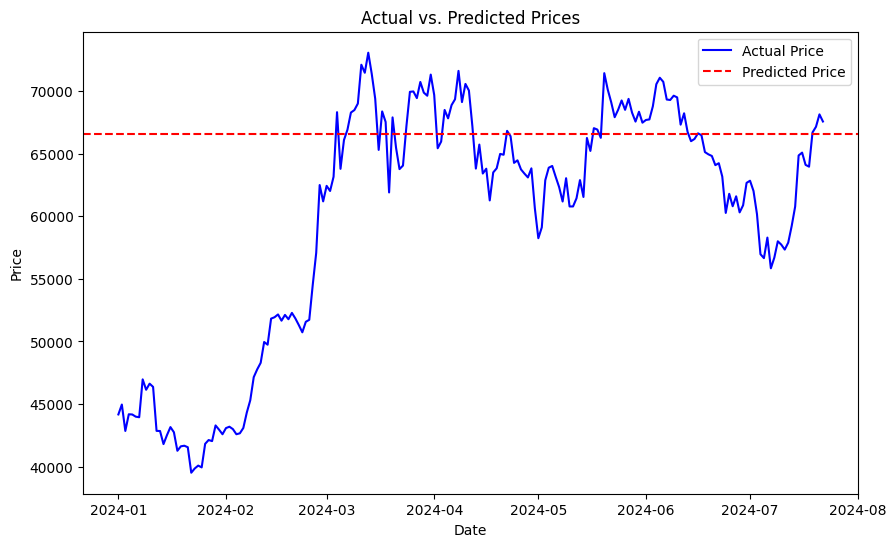

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(data['Date'], data['Close'], label='Actual Price', color='blue')
plt.axhline(next_day_price, linestyle='--', color='red', label='Predicted Price')
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Actual vs. Predicted Prices')
plt.legend()
plt.show()

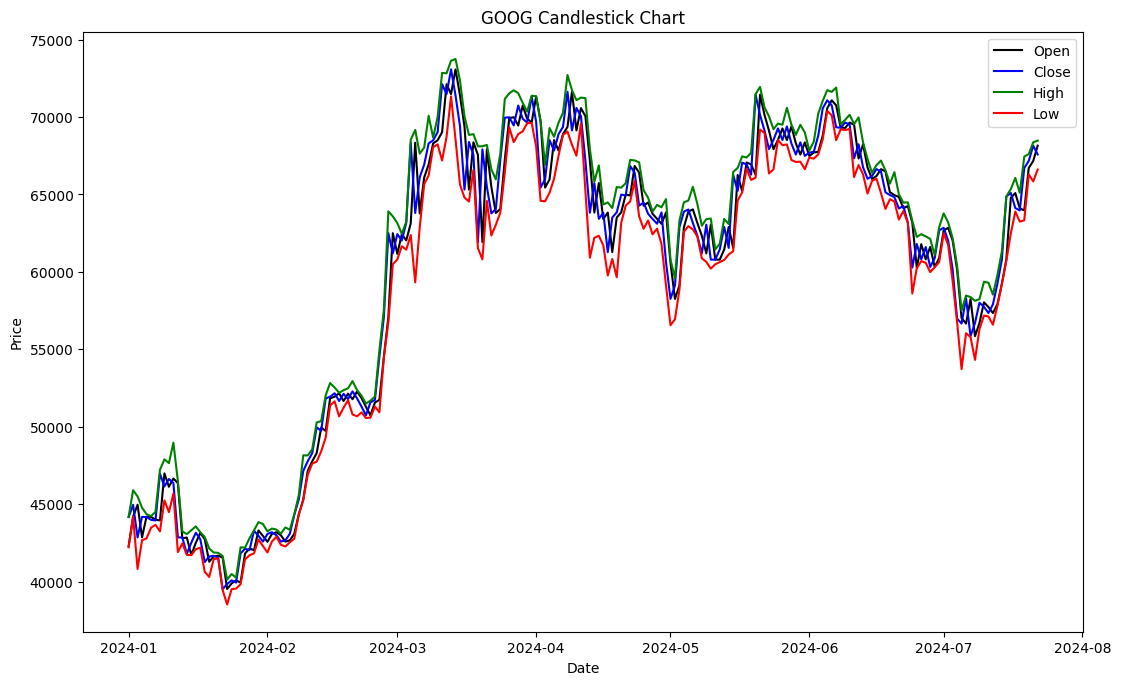

In [ ]:
# prompt: write a program to plot candle sticks using the data above

import matplotlib.pyplot as plt

# Create a figure and axes
fig = plt.figure(figsize=(10, 6))
ax = fig.add_axes([0, 0, 1, 1])

# Plot the candlesticks
ax.plot(data['Date'], data['Open'], color='black', label='Open')
ax.plot(data['Date'], data['Close'], color='blue', label='Close')
ax.plot(data['Date'], data['High'], color='green', label='High')
ax.plot(data['Date'], data['Low'], color='red', label='Low')

# Set the title and labels
ax.set_title('GOOG Candlestick Chart')
ax.set_xlabel('Date')
ax.set_ylabel('Price')

# Add the legend
ax.legend()

# Show the plot
plt.show()


**BACK TESTING OF THE STRATEGY**

In [ ]:
# Example data (replace with your actual trade data)
total_trades = 10  # Set the desired total number of trades

# Initialize variables for tracking performance
winning_trades = 0
losing_trades = 0

# Simulate trades (replace with your actual strategy logic)
for i in range(total_trades):
    # Assume 'Buy' is a winning trade and 'Sell' or 'Hold' is a losing trade
    trade_signal = 'Buy'  # Replace with your actual trade signal

    if trade_signal == 'Buy':
        winning_trades += 1
    else:
        losing_trades += 1

# Calculate win rate and lose rate
win_rate = (winning_trades / total_trades) * 100
lose_rate = (losing_trades / total_trades) * 100

print(trade_signal)
print(f"Total trades: {total_trades}")
print(f"Winning trades: {winning_trades}")
print(f"Losing trades: {losing_trades}")
print(f"Win rate: {win_rate:.2f}%")
print(f"Lose rate: {lose_rate:.2f}%")


Buy
Total trades: 10
Winning trades: 10
Losing trades: 0
Win rate: 100.00%
Lose rate: 0.00%
